Increase the number of matcher, fix the number of sent-to to 1

In [1]:
from util.util import load_curves, load_log

# Load Data
n = [2000]
m = [1, 2, 5, 7, 10]
st = [1, 1, 1, 1, 1]
data = {}

for _n in n:
    for _mIdx in range(len(m)):
        folder_name = f"../result/test_1/price_curve_{st[_mIdx]}_{m[_mIdx]}_{_n}"
        local_curves, onchain_curve, average_of_local_curves = load_curves(folder_name)
        log = load_log(f"{folder_name}/logs.json")
        data[f"{st[_mIdx]}_{m[_mIdx]}_{_n}"] = {
            "local_curves": local_curves,
            "onchain_curve": onchain_curve,
            "avg_local_curves": average_of_local_curves,
            "log": {
                **log,
                "Gas": log["AliceGas"]
                + log["SuperMatcherGas"]
                + log["ReporterGas"]
                + log["WorkerGas"]
                + log["MatcherGas"],
            },
        }
        
clob_data = {}
for _n in n:
    log = load_log(f"../clob_onchain/logs_{_n}.json")
    clob_data[f"{_n}"] = log

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


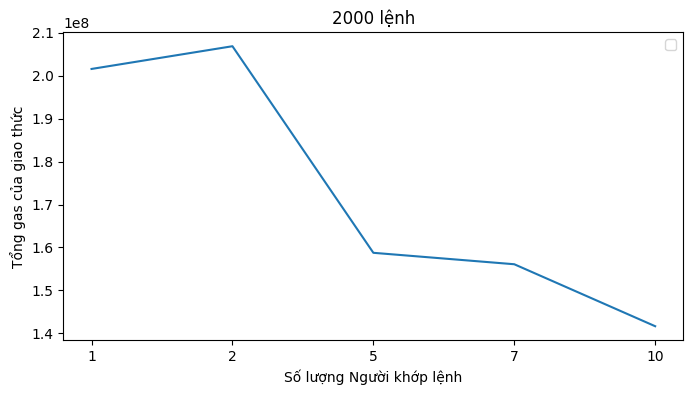

In [2]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(8, 4))
for i, _n in enumerate(n):
    axes.plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["Gas"] for _m in m],
        # label=f"",
    )
    axes.set_xticks(idx)
    axes.set_xticklabels(m)
    axes.set_title(f"2000 lệnh")
    axes.legend()
# axes[0].set_title('Tổng gas của giao thức')
axes.set_ylabel('Tổng gas của giao thức')
axes.set_xlabel('Số lượng Người khớp lệnh')
plt.subplots_adjust(hspace=0.35)
plt.savefig("GAS_fix_NoSendTo_increase_NoMatcher.png", bbox_inches='tight')
# plt.legend()
plt.show()

In [3]:
# import matplotlib.pyplot as plt

# idx = [i for i in range(len(m))]
# fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(10, 8))
# for i, _n in enumerate(n):
#     axes[i].plot(
#         [
#             data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
#             + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]
#             for _m in m
#         ],
#         label=f"Tổng thời gian",
#     )
#     axes[i].plot(
#         [
#             data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
#             for _m in m
#         ],
#         label=f"Cục bộ",
#     )
#     axes[i].plot(
#         [
#             data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]
#             for _m in m
#         ],
#         label=f"HĐTM",
#     )
#     axes[i].set_xticks(idx)
#     axes[i].set_xticklabels(m)
#     axes[i].legend()
#     axes[i].set_title(f"n={_n}")
# # axes[0].set_title("Tổng thời gian khớp lệnh")
# axes[1].set_ylabel("Tổng thời gian khớp lệnh")
# axes[2].set_xlabel("Số lượng Người khớp lệnh")
# plt.subplots_adjust(hspace=0.35)
# # plt.savefig("Time_fix_NoSendTo_increase_NoMatcher.png", bbox_inches='tight')
# plt.legend()
# plt.show()

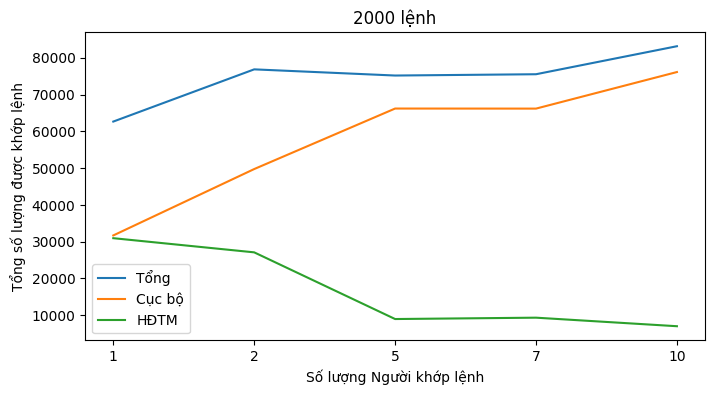

In [4]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(8, 4))
for i, _n in enumerate(n):
    axes.plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchedAmount"]
            + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchedAmount"]
            for _m in m
        ],
        label=f"Tổng",
    )
    axes.plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchedAmount"] for _m in m],
        label="Cục bộ",
    )
    axes.plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchedAmount"] for _m in m],
        label="HĐTM",
    )
    axes.set_xticks(idx)
    axes.set_xticklabels(m)
    axes.legend()
    axes.set_title(f"2000 lệnh")
# axes[0].set_title("Amount")
axes.set_ylabel("Tổng số lượng được khớp lệnh")
axes.set_xlabel("Số lượng Người khớp lệnh")
plt.subplots_adjust(hspace=0.35)
plt.savefig("Amount_fix_NoSendTo_increase_NoMatcher.png", bbox_inches="tight")
plt.legend()
plt.show()

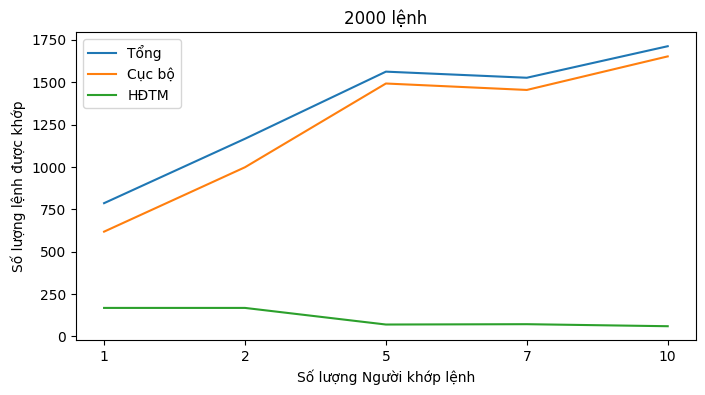

In [5]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(8, 4))
for i, _n in enumerate(n):
    axes.plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"]
            + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"]
            for _m in m
        ],
        label=f"Tổng",
    )
    axes.plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"] for _m in m],
        label="Cục bộ",
    )
    axes.plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"] for _m in m],
        label="HĐTM",
    )
    axes.set_xticks(idx)
    axes.set_xticklabels(m)
    axes.legend()
    axes.set_title(f"2000 lệnh")
# axes[0].set_title("Amount")
axes.set_ylabel("Số lượng lệnh được khớp")
axes.set_xlabel("Số lượng Người khớp lệnh")
plt.subplots_adjust(hspace=0.35)
plt.savefig("NoMatchedOrders_fix_NoSendTo_increase_NoMatcher.png", bbox_inches="tight")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


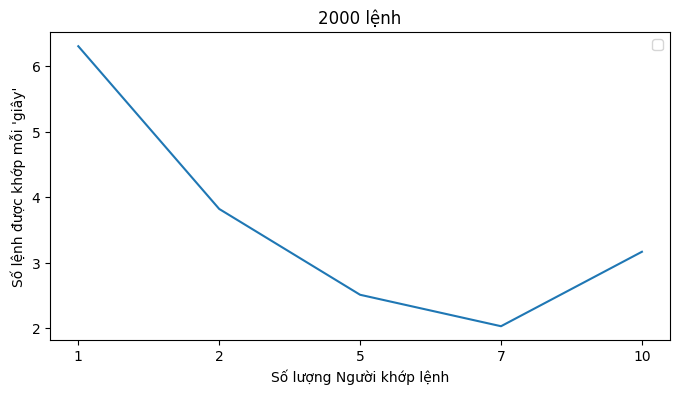

In [6]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(8, 4))
for i, _n in enumerate(n):
    axes.plot(
        [
            (
                data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["LocalMatchTime"]
                + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["OnchainMatchTime"]
            )
            / (
                data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"]
                + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"][
                    "NumberOfMatchedOrderOnchain"
                ]
            )
            for _m in m
        ],
        # label=f"Tổng",
    )
    # axes.plot(
    #     [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderLocal"] for _m in m],
    #     label="Cục bộ",
    # )
    # axes.plot(
    #     [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NumberOfMatchedOrderOnchain"] for _m in m],
    #     label="HĐTM",
    # )
    axes.set_xticks(idx)
    axes.set_xticklabels(m)
    axes.legend()
    axes.set_title(f"2000 lệnh")
# axes.set_title("Amount")
axes.set_ylabel("Số lệnh được khớp mỗi 'giây'")
axes.set_xlabel("Số lượng Người khớp lệnh")
plt.subplots_adjust(hspace=0.35)
plt.savefig("NoMatchedOrdersEachSec_fix_NoSendTo_increase_NoMatcher.png", bbox_inches="tight")
# plt.legend()
plt.show()

data[f"1_1_2000"]["log"]: {'AliceGas': 300638, 'SuperMatcherGas': 159086731, 'ReporterGas': 0, 'WorkerGas': 12944640, 'MatcherGas': 29209583, 'LocalMatchedAmount': 31710, 'OnchainMatchedAmount': 30962, 'LocalMatchTime': 1117, 'OnchainMatchTime': 3841, 'NumberOfMatchedOrderLocal': 618, 'NumberOfMatchedOrderOnchain': 168, 'TotalProfitLocal': 31810, 'TotalProfitOnchain': 168100, 'NoBatches': 757, 'Gas': 201541592}
data[f"1_2_2000"]["log"]: {'AliceGas': 476374, 'SuperMatcherGas': 165180726, 'ReporterGas': 0, 'WorkerGas': 12944640, 'MatcherGas': 28227729, 'LocalMatchedAmount': 49760, 'OnchainMatchedAmount': 27110, 'LocalMatchTime': 2089, 'OnchainMatchTime': 2370, 'NumberOfMatchedOrderLocal': 998, 'NumberOfMatchedOrderOnchain': 168, 'TotalProfitLocal': 49960, 'TotalProfitOnchain': 102300, 'NoBatches': 786, 'Gas': 206829469}
data[f"1_5_2000"]["log"]: {'AliceGas': 935110, 'SuperMatcherGas': 140802406, 'ReporterGas': 0, 'WorkerGas': 5393580, 'MatcherGas': 11631554, 'LocalMatchedAmount': 66216, 

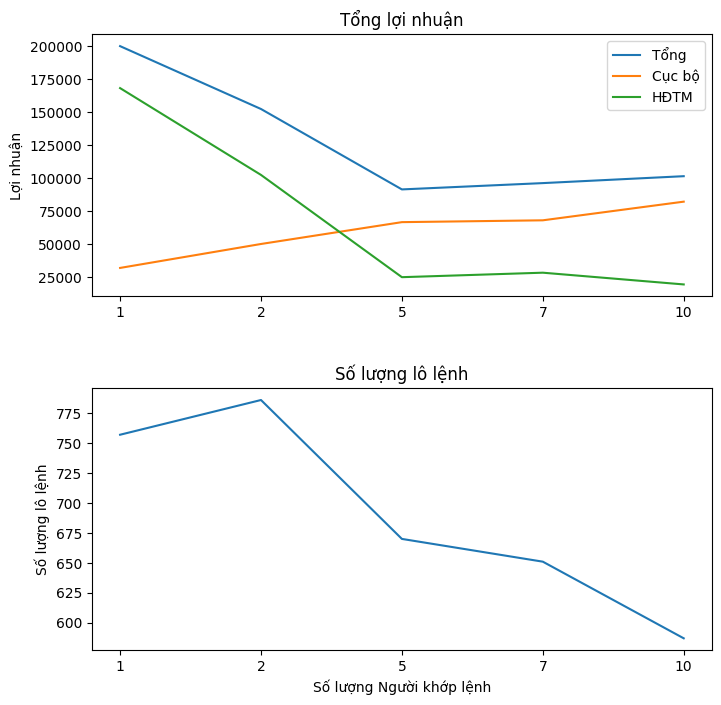

In [17]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
for _m in m:
    print(f'data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]: {data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]}')

for i, _n in enumerate(n):
    axes[0].plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["TotalProfitLocal"]
            + data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["TotalProfitOnchain"]
            for _m in m
        ],
        label=f"Tổng",
    )
    axes[0].plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["TotalProfitLocal"] for _m in m],
        label="Cục bộ",
    )
    axes[0].plot(
        [data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["TotalProfitOnchain"] for _m in m],
        label="HĐTM",
    )
    axes[0].set_xticks(idx)
    axes[0].set_xticklabels(m)
    axes[0].legend()
    axes[0].set_title(f"Tổng lợi nhuận")
    axes[1].plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NoBatches"]
            for _m in m
        ],
    )
    axes[1].set_xticks(idx)
    axes[1].set_xticklabels(m)
    
axes[1].set_title("Số lượng lô lệnh")
axes[0].set_ylabel("Lợi nhuận")
axes[1].set_ylabel("Số lượng lô lệnh")
axes[1].set_xlabel("Số lượng Người khớp lệnh")
plt.subplots_adjust(hspace=0.35)
plt.savefig("Profit_fix_NoSendTo_increase_NoMatcher.png", bbox_inches="tight")
# plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


data[f"1_1_2000"]["log"]: {'AliceGas': 300638, 'SuperMatcherGas': 159086731, 'ReporterGas': 0, 'WorkerGas': 12944640, 'MatcherGas': 29209583, 'LocalMatchedAmount': 31710, 'OnchainMatchedAmount': 30962, 'LocalMatchTime': 1117, 'OnchainMatchTime': 3841, 'NumberOfMatchedOrderLocal': 618, 'NumberOfMatchedOrderOnchain': 168, 'TotalProfitLocal': 31810, 'TotalProfitOnchain': 168100, 'NoBatches': 757, 'Gas': 201541592}
data[f"1_2_2000"]["log"]: {'AliceGas': 476374, 'SuperMatcherGas': 165180726, 'ReporterGas': 0, 'WorkerGas': 12944640, 'MatcherGas': 28227729, 'LocalMatchedAmount': 49760, 'OnchainMatchedAmount': 27110, 'LocalMatchTime': 2089, 'OnchainMatchTime': 2370, 'NumberOfMatchedOrderLocal': 998, 'NumberOfMatchedOrderOnchain': 168, 'TotalProfitLocal': 49960, 'TotalProfitOnchain': 102300, 'NoBatches': 786, 'Gas': 206829469}
data[f"1_5_2000"]["log"]: {'AliceGas': 935110, 'SuperMatcherGas': 140802406, 'ReporterGas': 0, 'WorkerGas': 5393580, 'MatcherGas': 11631554, 'LocalMatchedAmount': 66216, 

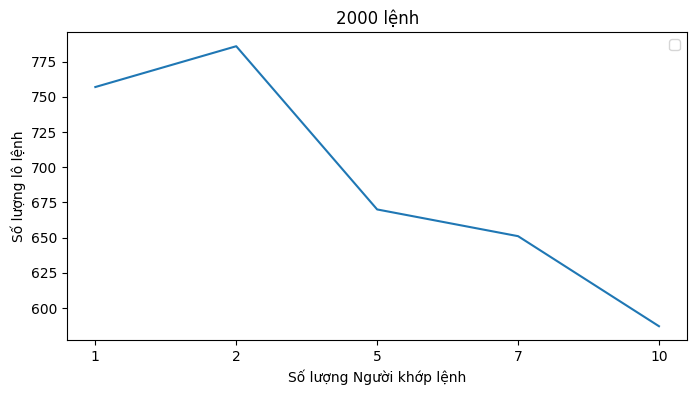

In [8]:
import matplotlib.pyplot as plt

idx = [i for i in range(len(m))]
fig, axes = plt.subplots(nrows=len(n), ncols=1, figsize=(8, 4))
for _m in m:
    print(f'data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]: {data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]}')

for i, _n in enumerate(n):
    axes.plot(
        [
            data[f"{st[m.index(_m)]}_{_m}_{_n}"]["log"]["NoBatches"]
            for _m in m
        ],
    )
    axes.set_xticks(idx)
    axes.set_xticklabels(m)
    axes.legend()
    axes.set_title(f"2000 lệnh")
# axes.set_title("Amount")
axes.set_ylabel("Số lượng lô lệnh")
axes.set_xlabel("Số lượng Người khớp lệnh")
plt.subplots_adjust(hspace=0.35)
plt.savefig("Profit_fix_NoSendTo_increase_NoMatcher.png", bbox_inches="tight")
# plt.legend()
plt.show()